# Prediction of death based on the Titanic dataset

This is the classic machine learning classification project idea using the iconic Titanic dataset. 



# Import modules

In [107]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


# Data cleaning

In [108]:
# Loading the dataset

path_currDir = os.getcwd()
path_dataset = os.path.join( path_currDir, 'datasets', 'titanic_dataset.csv' )
path_dataset

raw_data = pd.read_csv(path_dataset)
raw_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
print(raw_data.shape)
raw_data.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset has 891 rows
Columns (features of the dataset):
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
342 passengers survived out of 891


Text(0.5, 1.0, 'Survived (1) vs deceased (0)')

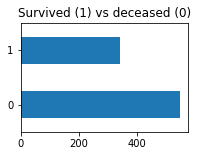

In [110]:
# exploring the dataset
print("The dataset has", len(raw_data), "rows")
print("Columns (features of the dataset):")
print(list(raw_data.columns))
print(sum(raw_data['Survived']),'passengers survived out of',len(raw_data))


raw_data['Survived'].value_counts().plot(kind='barh', figsize=(3,2))
plt.title('Survived (1) vs deceased (0)')

In [111]:
# cleaning up the data

# Check out how many columns have missing values
print(f"Missing values per feature: \n{raw_data.isna().sum()}")
# It seems that the "cabin" feature has too many missing values
# so let's drop "cabin"
clean_data = raw_data.drop('Cabin', axis=1)
print('-'*50)

# For the "Age" column, let's fill in the missing values with the median of all ages
median_age = raw_data['Age'].median()
clean_data['Age'] = clean_data['Age'].fillna(median_age)
# for Embarked column, let's make a new category "U" - for unknown port of embarkment
clean_data['Embarked'] = clean_data['Embarked'].fillna('U')
print('Missing values post-processing:')
print(clean_data.isna().sum())
clean_data.head()

Missing values per feature: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
Missing values post-processing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data preprocessing

For preprocessing, we can manipulate the features in the following ways:
- One-hot encoding;
- Binning;
- Feature selection;

In [112]:
# Let create a copy for preprocessing
preprocessed_data = clean_data.copy(deep=True)


In [113]:
"""
Let's start with the features selection. 
Some features are unique for each passenger, 
such as passengerId, Name, and Ticket; therefore, let's delete them:
"""
preprocessed_data.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)
preprocessed_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [114]:
"""
One-hot encoding
The best strategy to deal with the categorical data is to hot-encode it. 
In our case, these are features "Sex" and "Embarked":
"""
gender_columns = pd.get_dummies(preprocessed_data['Sex'], prefix='Sex')
embarked_columns = pd.get_dummies(preprocessed_data["Embarked"], prefix="Embarked")
# Concatenate the hot-encoded columns with the original dataframe
preprocessed_data = pd.concat([preprocessed_data, gender_columns], axis=1)
preprocessed_data = pd.concat([preprocessed_data, embarked_columns], axis=1)
preprocessed_data = preprocessed_data.drop(['Sex', 'Embarked'], axis=1)
preprocessed_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [115]:
"""
We can also hot-encode the numerical feature some numerical features, 
such as Pclass. 
Nevertheless, let's start with seeing if with higher class, 
there is increased survivability chance:
"""
class_survived = preprocessed_data[['Pclass', 'Survived']]

first_class = class_survived[class_survived['Pclass'] == 1]
second_class = class_survived[class_survived['Pclass'] == 2]
third_class = class_survived[class_survived['Pclass'] == 3]

print(f"In the first class,  {sum(first_class['Survived'])/len(first_class)*100  :.0f}% of passengers survived. ")
print(f"In the second class, {sum(second_class['Survived'])/len(second_class)*100:.0f}% of passengers survived. ")
print(f"In the third class,  {sum(third_class['Survived'])/len(third_class)*100  :.0f}% of passengers survived. ")

"""
There does seem to be a trend of increasing survivability 
with the increasing class,
therefore, I decide to leave it as is, without hot-encoding this feature.
""";


In the first class,  63% of passengers survived. 
In the second class, 47% of passengers survived. 
In the third class,  24% of passengers survived. 


In [116]:
"""
Now let's do some binning - turning numerical data into categorical data. 
We usually do this in features with lots of unknown values; 
in our cases, in the feature "Age" we handled a lot of missing values, 
therefore, let's bin the age into categories:
"""
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(preprocessed_data['Age'], bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data.drop(["Age"], axis=1, inplace=True)
cagegorized_age_columns = pd.get_dummies(preprocessed_data['Categorized_age'], prefix='Categorized_age')
preprocessed_data = pd.concat([preprocessed_data, cagegorized_age_columns], axis=1)
preprocessed_data = preprocessed_data.drop(['Categorized_age'], axis=1)
preprocessed_data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,3,1,0,7.2500,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,0,3,0,0,8.0500,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [118]:
"""
Let's normalize "Fare" by log
"""
print(preprocessed_data['Fare'].min())
preprocessed_data['Fare'].replace(0, 0.1, inplace=True)
print(preprocessed_data['Fare'].min())
preprocessed_data['Fare'] = np.log10(preprocessed_data['Fare'])
preprocessed_data

0.0
0.1


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,3,1,0,0.860338,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1,1,1,0,1.852988,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,0,0,0.898999,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,1,1,1,0,1.725095,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,0,3,0,0,0.905796,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1.113943,0,1,0,0,1,0,0,0,1,0,0,0,0,0
887,888,1,1,0,0,1.477121,1,0,0,0,1,0,0,1,0,0,0,0,0,0
888,889,0,3,1,2,1.370143,1,0,0,0,1,0,0,0,1,0,0,0,0,0
889,890,1,1,0,0,1.477121,0,1,1,0,0,0,0,0,1,0,0,0,0,0


In [119]:
"""
The dataset is cleaned and preprocessed, now we can save it as a file by
using the command below
"""
# preprocessed_data.to_csv('preprocessed_titanic_data.csv', index=None)

'\nThe dataset is cleaned and preprocessed, now we can save it as a file by\nusing the command below\n'

# Training the model

We'll train the following models:
- Logistic regression (perceptron)
- Decision tree
- Naive Bayes
- SVM
- random forest
- gradient boosted tree
- AdaBoost model

In [120]:
data = preprocessed_data.copy(deep=True)

# Features-labels split and train-validation split
# Features - all the columns except "Survived"
features = data.drop(['Survived'], axis=1)
labels = data['Survived']

# Split the data into test-train-validation sets: 60-20-20%
## First split the data into two groups: one with train data, the other - with mixed test and validate
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
	features, labels, test_size=0.4, 
	random_state=100 # We fix random_state to make sure we get the same split every time
)
## Now, split the test-validate group into the separate test and validate groups
features_validation, features_test, labels_validation, labels_test = train_test_split(
	features_validation_test, labels_validation_test, test_size=0.5, random_state=100
)
print(f"For training, we will use {len(features_train)} features and {len(labels_train)} labels.")
print(f"For validation, we will use {len(features_validation)} features and {len(labels_validation)} labels.")
print(f"For testing, we will use {len(features_test)} features and {len(labels_test)} labels.")

For training, we will use 534 features and 534 labels.
For validation, we will use 178 features and 178 labels.
For testing, we will use 179 features and 179 labels.


In [121]:
lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)

svm_model = SVC()
svm_model.fit(features_train, labels_train)

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier()

In [122]:
"""
Evaluating the models,
metric - accuracy

The model with the highest accuracy (81%) seems to be gradient boosting
"""
accuracy_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	accuracy_scores[j] = i.score(features_validation, labels_validation)

# Sort the dictionary based on value
accuracy_scores2 = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

print('Accuracies (high -> low): ')
for i in accuracy_scores2:
	print(f" - {i}: {accuracy_scores2[i]:.2f}")


Accuracies (high -> low): 
 - Gradient Boosting: 0.79
 - Random forest: 0.78
 - Logistic Regression: 0.76
 - AdaBoost: 0.75
 - Naive Bayes: 0.74
 - Decision Tree: 0.74
 - SVM: 0.61


In [123]:
"""
Evaluating the models,
metric - F1 score

The highest score here is, once again, that of gradient boosting
(F1 score = 0.74)
"""
# metric = F1 score

f1_scores = {}
models = [lr_model, dt_model, nb_model, svm_model, rf_model, gb_model, ab_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random forest', 'Gradient Boosting', 'AdaBoost']

for i,j in zip( models, model_names ):
	predicted_labels = i.predict(features_validation)
	f1_scores[j] = f1_score(labels_validation, predicted_labels)

# Sort the dictionary based on value
f1_scores2 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

print('F1 score values (high -> low): ')
for i in f1_scores2:
	print(f" - {i}: {f1_scores2[i]:.2f}")



F1 score values (high -> low): 
 - Gradient Boosting: 0.71
 - Random forest: 0.68
 - Logistic Regression: 0.68
 - Naive Bayes: 0.67
 - AdaBoost: 0.66
 - Decision Tree: 0.65
 - SVM: 0.00


# Finetuning

Above we did the training with the default hyperparameters.

Now let's finetune them by a Grid search. Let's choose Gradient Boosting for the grid search

In [124]:
features_trainValidation = pd.concat([features_train, features_validation], ignore_index=True)
print(features_trainValidation.shape)

labels_trainValidation = pd.concat([labels_train, labels_validation], axis='rows')
print(labels_trainValidation.shape)

(712, 19)
(712,)


In [125]:
grid_search_parameters = {
# 	'loss': ['log_loss'],
	'min_samples_split': [2,5,8,11],
	'min_samples_leaf': [1,4,7,9],
	'max_depth': [1,2,3,4], 
	'learning_rate': [0.1, 0.5, 1],
	'n_estimators': [1, 40, 80, 120]
}

gb_grid = GradientBoostingClassifier()
gb_grid2 = GridSearchCV(estimator = gb_grid, param_grid = grid_search_parameters)
gb_grid2.fit(features_trainValidation, labels_trainValidation)
# gb_grid2.fit(features_train, labels_train)

gb_winner = gb_grid2.best_estimator_
print(gb_winner)
# accuracy on basically train+validation set
print(gb_winner.score(features_trainValidation, labels_trainValidation))

# Couldn't improve much, unfortunately

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=5,
                           n_estimators=120)
0.9157303370786517


# Test

Now let's test our chosen model on the test dataset:

In [126]:
predictions = gb_winner.predict( features_test )
print(f"Accuracy of the final model on the testing data: {accuracy_score( labels_test, predictions ):.2f}")


Accuracy of the final model on the testing data: 0.83


# Save model